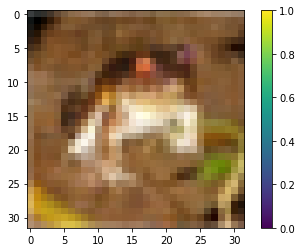

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

#https://www.cs.toronto.edu/~kriz/cifar.html(Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009.)
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.cifar10.load_data() 

#1-automobile = 1, dinosaur = 2, cat = 3, deer = 4, airplane = 5, frog = 6, horse = 7, ship = 8, truck = 9
class_names = ['automobile', 'bird', 'cat', 'deer', 'airplane', 'frog', 'horse', 'ship', 'truck']

train_images = train_images / 255.0  # Takes away some pixels before sending into the model (255 because that is the range of pixels in each picture 0-255)
test_images = test_images / 255.0

plt.figure()
plt.imshow(train_images[0])  # These preprocess the data
plt.colorbar()
plt.grid(False)



In [2]:
model = tf.keras.Sequential([   # creating a model with layers which are basically data modifiers and labelers
    tf.keras.layers.Flatten(input_shape=(32, 32,3)), #Takes the 2 dimensional array 28X28 pixels too 1 dimensional 748 pixel array
    tf.keras.layers.Dense(256, activation='relu'), # The first Dense layer has 128 nodes (or neurons)
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10) #The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.
])

#Could make the results better by increasing layers or adding neurons
#Could look into convolutional layer instead (for 2d array)

model.compile(optimizer='adam', #This is how the model is updated based on the data it sees and its loss function.
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
              metrics=['accuracy']) #Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [3]:


model.fit(train_images,train_labels, epochs=20) #Fits the model to the training data. Start of learning

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 17s 336us/sample - loss: 1.8594 - accuracy: 0.3285
Epoch 2/20
50000/50000 [==============================] - 15s 293us/sample - loss: 1.6921 - accuracy: 0.3942
Epoch 3/20
50000/50000 [==============================] - 15s 302us/sample - loss: 1.6198 - accuracy: 0.4220
Epoch 4/20
50000/50000 [==============================] - 15s 292us/sample - loss: 1.5705 - accuracy: 0.4383
Epoch 5/20
50000/50000 [==============================] - 15s 306us/sample - loss: 1.5314 - accuracy: 0.4550- l
Epoch 6/20
50000/50000 [==============================] - 15s 298us/sample - loss: 1.5015 - accuracy: 0.4628
Epoch 7/20
50000/50000 [==============================] - 15s 298us/sample - loss: 1.4775 - accuracy: 0.4728
Epoch 8/20
50000/50000 [==============================] - 15s 303us/sample - loss: 1.4633 - accuracy: 0.4783
Epoch 9/20
50000/50000 [==============================] - 15s 297us/sample - loss: 1.4420 - accuracy: 

In [4]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) #Seeing the models performance on the test dataset

print('\nTest accuracy:', test_acc) # Will be worse accuracy than the training data set, which means the model is overfitted so it performs worse on new information than its old information

10000/10000 - 1s - loss: 1.4912 - accuracy: 0.4782

Test accuracy: 0.4782


In [5]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()]) #Converts the model to probability logits
predictions = probability_model.predict(test_images) #The model has predicted the label for each image in the testing set
predictions[0] # Will show how confident the model is about saying that the picture is one of the articles of clothing. Higher number means more confidence

array([0.03378117, 0.01720163, 0.02802441, 0.3921038 , 0.1356448 ,
       0.32756552, 0.0102349 , 0.00088599, 0.05062369, 0.00393415],
      dtype=float32)

In [6]:
np.argmax(predictions[0]) #Shows the most confident prediction

3

In [7]:
test_labels[0] #To check the model, which is correct

array([3], dtype=uint8)

In [10]:
# Grab an image from the test dataset.
img = test_images[np.random.randint(400)]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = probability_model.predict(img)

print(predictions_single)

np.argmax(predictions_single)
print("The model thinks it's a ")
print(class_names[np.argmax(predictions_single)-1])

(32, 32, 3)
(1, 32, 32, 3)
[[0.00837917 0.5002975  0.06269096 0.04196026 0.00684979 0.01935722
  0.08703174 0.06540264 0.04708498 0.16094576]]
The model thinks it's a 
automobile


<function matplotlib.pyplot.show(close=None, block=None)>

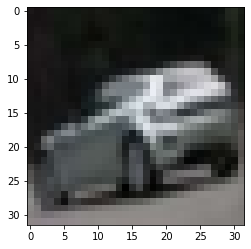

In [11]:
plt.imshow(img[0])
plt.show